<a href="https://colab.research.google.com/github/LilKedin/FF_Model/blob/main/Risk_Factor_Model_Estimation_for_any_Security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
pdr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [139]:
start = "1920-01-01"

There is too much noise with daily data so I use the Monthly timeframe

In [140]:
ff = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()

In [141]:
ff

{0:          Mkt-RF   SMB    HML    RF
 Date                              
 1926-07    2.96 -2.38  -2.73  0.22
 1926-08    2.64 -1.47   4.14  0.25
 1926-09    0.36 -1.39   0.12  0.23
 1926-10   -3.24 -0.13   0.65  0.32
 1926-11    2.53 -0.16  -0.38  0.31
 ...         ...   ...    ...   ...
 2021-10    6.65 -2.28  -0.44  0.00
 2021-11   -1.55 -1.35  -0.53  0.00
 2021-12    3.10 -1.57   3.23  0.01
 2022-01   -6.24 -5.87  12.79  0.00
 2022-02   -2.29  2.19   3.12  0.00
 
 [1148 rows x 4 columns], 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.83  -3.40  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.69  11.65  4.75
 1930  -31.23  -5.34 -11.76  2.41
 1931  -45.11   3.64 -14.56  1.07
 ...      ...    ...    ...   ...
 2017   21.51  -4.95 -13.48  0.80
 2018   -6.93  -3.34  -9.80  1.81
 2019   28.28  -6.06 -10.48  2.14
 2020   23.67  12.89 -46.60  0.44
 2021   23.57  -3.80  25.33  0.04
 
 [95 rows x 4 columns], 'DESCR': 'F-F Research Data Fac

In [142]:
ff_df = ff[0]

In [143]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.38,-2.73,0.22
1926-08,2.64,-1.47,4.14,0.25
1926-09,0.36,-1.39,0.12,0.23
1926-10,-3.24,-0.13,0.65,0.32
1926-11,2.53,-0.16,-0.38,0.31
...,...,...,...,...
2021-10,6.65,-2.28,-0.44,0.00
2021-11,-1.55,-1.35,-0.53,0.00
2021-12,3.10,-1.57,3.23,0.01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3253a7090>,
      dtype=object)

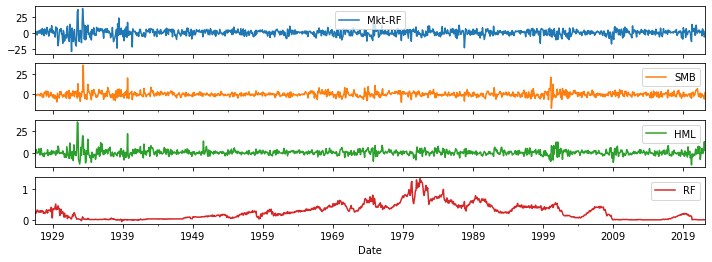

In [144]:
ff_df.plot(subplots=True, figsize=(12,4))

Here I decided to take rolling values over 2 years to smoothen the data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe325155310>,
      dtype=object)

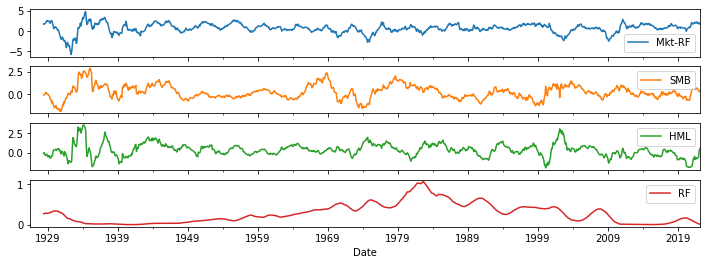

In [145]:
ff_df.rolling(24).mean().plot(subplots=True, figsize=(12,4))

In [146]:
ff_momo_df = pdr.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M', start=start).read()[0]

In [147]:
ff_momo_df

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2021-10,3.21
2021-11,0.82
2021-12,-2.67


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe324e75b90>],
      dtype=object)

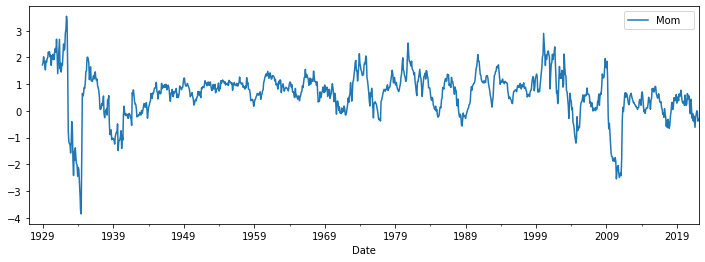

In [148]:
ff_momo_df.rolling(24).mean().plot(subplots=True, figsize=(12,4))

In [149]:
from numpy import inner
from datetime import date
ff_merged_df = pd.merge(ff_df,ff_momo_df,on='Date',how='inner',)
ff_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.51,4.73,0.25,0.36
1927-02,4.18,-0.25,3.27,0.26,-2.14
1927-03,0.13,-1.89,-2.56,0.30,3.61
1927-04,0.46,0.49,0.71,0.25,4.30
1927-05,5.44,1.46,4.98,0.30,3.00
...,...,...,...,...,...
2021-10,6.65,-2.28,-0.44,0.00,3.21
2021-11,-1.55,-1.35,-0.53,0.00,0.82
2021-12,3.10,-1.57,3.23,0.01,-2.67


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe324e0c1d0>,
      dtype=object)

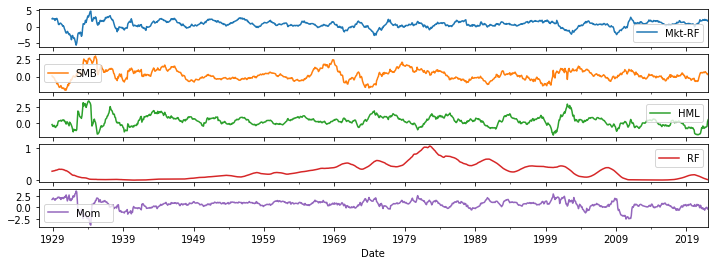

In [150]:
ff_merged_df.rolling(24).mean().plot(subplots=True, figsize=(12,4))

Installing yfinance because it doesn't work with Pandas Datareader in Colab.

In [151]:
!pip install yfinance

Method overriding in Python is when you have two methods with the same name that each perform different tasks. This is an important feature of inheritance in Python.

In method overriding, the child class can change its functions that are defined by its ancestral classes. In other words, the child class has access to the properties and functions of the parent class method while also extending additional functions of its own to the method.

**Here I am using it to avoid the Pandas DataReader Error with Colab.**

In [152]:
import yfinance as yf
yf.pdr_override()

I am resampling to Monthly Data to keep my data consistant structurally.

In [153]:
#Select your security
Security = 'F'
Security_data = pdr.data.get_data_yahoo(Security,start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [154]:
Security_data

Date
1972-06-30         NaN
1972-07-31    0.022400
1972-08-31    0.042553
1972-09-30   -0.011131
1972-10-31    0.004665
                ...   
2021-12-31    0.082334
2022-01-31   -0.017604
2022-02-28   -0.134975
2022-03-31   -0.037016
2022-04-30   -0.015376
Freq: M, Name: Adj Close, Length: 599, dtype: float64

In [155]:
Security_df = Security_data.to_frame()
Security_df

,Adj Close
Date,
1972-06-30,NaN
1972-07-31,0.022400
1972-08-31,0.042553
1972-09-30,-0.011131
1972-10-31,0.004665
...,...
2021-12-31,0.082334
2022-01-31,-0.017604
2022-02-28,-0.134975


Comparing my data types:

In [156]:
Security_df.index.dtype

dtype('<M8[ns]')

In [157]:
ff_merged_df.index.dtype

period[M]

Transforming my data to the same format by using the strftime method.

In [158]:
Security_df['str_date'] = Security_df.index.astype(str)
Security_df['dt_date'] = pd.to_datetime(Security_df['str_date']).dt.strftime('%Y-%m')

In [159]:
Security_df.dt_date.dtype

dtype('O')

In [160]:
ff_merged_df['str_date'] = ff_merged_df.index.astype(str)
ff_merged_df['dt_date'] = pd.to_datetime(ff_merged_df['str_date']).dt.strftime('%Y-%m')

In [161]:
Security_df.dt_date.dtype

dtype('O')

In [162]:
ff_merged_security_df = pd.merge(Security_df,ff_merged_df,on='dt_date',how='inner',sort=True,indicator=False,validate='one_to_one')
ff_merged_security_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1972-06-30,1972-06,-2.43,0.24,-2.49,0.29,1.90,1972-06
1,0.022400,1972-07-31,1972-07,-0.80,-2.87,0.66,0.31,2.70,1972-07
2,0.042553,1972-08-31,1972-08,3.26,-4.03,4.53,0.29,-5.40,1972-08
3,-0.011131,1972-09-30,1972-09,-1.14,-2.65,0.47,0.34,1.82,1972-09
4,0.004665,1972-10-31,1972-10,0.52,-2.73,1.35,0.40,0.71,1972-10
...,...,...,...,...,...,...,...,...,...
592,0.206215,2021-10-31,2021-10,6.65,-2.28,-0.44,0.00,3.21,2021-10
593,0.129194,2021-11-30,2021-11,-1.55,-1.35,-0.53,0.00,0.82,2021-11
594,0.082334,2021-12-31,2021-12,3.10,-1.57,3.23,0.01,-2.67,2021-12
595,-0.017604,2022-01-31,2022-01,-6.24,-5.87,12.79,0.00,-2.53,2022-01


Cleaning the data and renaming Adj Close to the security selected at the beginning of the code.

In [163]:
ff_merged_security_df.drop(columns=['str_date_x','str_date_y'],inplace=True)
ff_merged_security_df.rename(columns={'Adj Close':Security},inplace=True)
ff_merged_security_df

,F,dt_date,Mkt-RF,SMB,HML,RF,Mom
0,NaN,1972-06,-2.43,0.24,-2.49,0.29,1.90
1,0.022400,1972-07,-0.80,-2.87,0.66,0.31,2.70
2,0.042553,1972-08,3.26,-4.03,4.53,0.29,-5.40
3,-0.011131,1972-09,-1.14,-2.65,0.47,0.34,1.82
4,0.004665,1972-10,0.52,-2.73,1.35,0.40,0.71
...,...,...,...,...,...,...,...
592,0.206215,2021-10,6.65,-2.28,-0.44,0.00,3.21
593,0.129194,2021-11,-1.55,-1.35,-0.53,0.00,0.82
594,0.082334,2021-12,3.10,-1.57,3.23,0.01,-2.67
595,-0.017604,2022-01,-6.24,-5.87,12.79,0.00,-2.53


Adding a column where I substract the risk-free rate from my security.

In [164]:
ff_merged_security_df[Security + "-Rf"] = ff_merged_security_df[Security]*100-ff_merged_security_df['RF']
ff_merged_security_df

,F,dt_date,Mkt-RF,SMB,HML,RF,Mom,F-Rf
0,NaN,1972-06,-2.43,0.24,-2.49,0.29,1.90,NaN
1,0.022400,1972-07,-0.80,-2.87,0.66,0.31,2.70,1.929971
2,0.042553,1972-08,3.26,-4.03,4.53,0.29,-5.40,3.965301
3,-0.011131,1972-09,-1.14,-2.65,0.47,0.34,1.82,-1.453130
4,0.004665,1972-10,0.52,-2.73,1.35,0.40,0.71,0.066548
...,...,...,...,...,...,...,...,...
592,0.206215,2021-10,6.65,-2.28,-0.44,0.00,3.21,20.621469
593,0.129194,2021-11,-1.55,-1.35,-0.53,0.00,0.82,12.919363
594,0.082334,2021-12,3.10,-1.57,3.23,0.01,-2.67,8.223446
595,-0.017604,2022-01,-6.24,-5.87,12.79,0.00,-2.53,-1.760377


In [165]:
ff_merged_security_df.dropna(axis='index',inplace=True)

SMB: Small Minus Big -> Size Factor
HML : High Minus Low Book Market Ratio (Value Vs. Growth)

Momentum:"subtracting the equal weighted average of the lowest performing firms from the equal weighed average of the highest performing firms, lagged one month (Carhart, 1997)"

Lower we can see how the Momentum factor has a weird naming with 3 blanks.

In [166]:
list(ff_merged_security_df)

['F', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   ', 'F-Rf']

Renaming and making the Ordinary Least Squares (OLS) regression

In [167]:
from statsmodels.api import OLS
ff_merged_security_df.rename(columns={'Mom   ':'MOM'},inplace=True)
results = OLS(ff_merged_security_df[Security + "-Rf"],ff_merged_security_df[['Mkt-RF','SMB','HML','MOM']],missing='drop').fit()

Unfortunately, we don't have the intercept here. I add it just after.

In [168]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   F-Rf   R-squared (uncentered):                   0.373
Model:                            OLS   Adj. R-squared (uncentered):              0.368
Method:                 Least Squares   F-statistic:                              87.90
Date:                Sat, 02 Apr 2022   Prob (F-statistic):                    1.30e-58
Time:                        21:57:06   Log-Likelihood:                         -2144.4
No. Observations:                 596   AIC:                                      4297.
Df Residuals:                     592   BIC:                                      4314.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2154      0.085     14.312      0.000       1.049       1.382
SMB            0.0548      0.124      0.442      0.659      -0.189       0.298
HML            0.7108      0.125      5.666      0.000       0.464       0.957
MOM           -0.6289      0.086     -7.333      0.000      -0.797      -0.460
==============================================================================
Omnibus:                      337.053   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8455.545
Skew:                           1.985   Prob(JB):                         0.00
Kurtosis:                      21.020   Cond. No.                         1.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
import statsmodels.tools
ff_merged_security_df_cst = statsmodels.tools.add_constant(ff_merged_security_df,prepend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Adding an intercept

In [170]:
ff_merged_security_df_cst

,const,F,dt_date,Mkt-RF,SMB,HML,RF,MOM,F-Rf
1,1.0,0.022400,1972-07,-0.80,-2.87,0.66,0.31,2.70,1.929971
2,1.0,0.042553,1972-08,3.26,-4.03,4.53,0.29,-5.40,3.965301
3,1.0,-0.011131,1972-09,-1.14,-2.65,0.47,0.34,1.82,-1.453130
4,1.0,0.004665,1972-10,0.52,-2.73,1.35,0.40,0.71,0.066548
5,1.0,0.137736,1972-11,4.60,-1.20,4.83,0.37,-5.09,13.403596
...,...,...,...,...,...,...,...,...,...
592,1.0,0.206215,2021-10,6.65,-2.28,-0.44,0.00,3.21,20.621469
593,1.0,0.129194,2021-11,-1.55,-1.35,-0.53,0.00,0.82,12.919363
594,1.0,0.082334,2021-12,3.10,-1.57,3.23,0.01,-2.67,8.223446
595,1.0,-0.017604,2022-01,-6.24,-5.87,12.79,0.00,-2.53,-1.760377


Here F-Rf is our dependant variable because we want to analyse the effect of SMB,HML and MOM on it.

The constant term is the intercept of the regression line. In regression we omit some independent variables that do not have much impact on the dependent variable, the intercept tells the average value of these omitted variables and noise present in model. Here it is 0.4992.

The coefficient terms tell the change in Y for a unit change in X  i.e if X rises by 1 unit then Y rises by 1.1940.

Standard error shows the sampling variability of the parameters.

t – statistics are calculated by assuming  following hypothesis – 

    H0  : B2  = 0       ( variable X has no influence on Y)
    Ha  : B2  ≠ 0      (X has significant impact on Y)
p-value is the probability of obtaining the t statistics at least as contradictory to H0  as calculated from assuming that the null hypothesis is true. In our example, we can reject the null hypothesis at almost every significance level apart for the SMB parameter.

R² is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Here, 36.9 % variation in F-Rf can be explained by our parameters.

In [171]:
results = OLS(ff_merged_security_df_cst[Security + "-Rf"],ff_merged_security_df_cst[['const','Mkt-RF','SMB','HML','MOM']],missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   F-Rf   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     86.34
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           9.64e-58
Time:                        21:57:06   Log-Likelihood:                -2143.6
No. Observations:                 596   AIC:                             4297.
Df Residuals:                     591   BIC:                             4319.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4992      0.377      1.323      0.186      -0.242       1.240
Mkt-RF         1.1940      0.086     13.821      0.000       1.024       1.364
SMB            0.0505      0.124      0.407      0.684      -0.193       0.294
HML            0.6799      0.128      5.332      0.000       0.429       0.930
MOM           -0.6522      0.087     -7.454      0.000      -0.824      -0.480
==============================================================================
Omnibus:                      332.824   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8148.570
Skew:                           1.957   Prob(JB):                         0.00
Kurtosis:                      20.686   Cond. No.                         5.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""